In [225]:
################ EXPERIMENT BELIZE

In [226]:
# A model to predict Tuberculosis Disease in the country of Belize

In [227]:
# Dataset
# Load data as a series and visualize data
# Load the data as a series
# Plot to see the trend

from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
from datetime import datetime

series = read_csv('belize_tb_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())


year
1980-01-01     21
1981-01-01     33
1982-01-01     44
1983-01-01    140
1984-01-01     35
Name: cases, dtype: int64


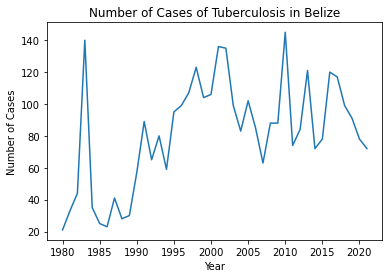

In [228]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()
ax.plot(series)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cases")
ax.set_title("Number of Cases of Tuberculosis in Belize")

# Save the plot as a PNG, JPEG and PDF files
plt.savefig("output/belize1p.png")
# Call the show function
plt.show()

In [217]:

#plt.savefig("output/belize1j.jpg")
#plt.savefig("output/belize1df.pdf")

<Figure size 432x288 with 0 Axes>

In [218]:
series.head()

year
1980-01-01     21
1981-01-01     33
1982-01-01     44
1983-01-01    140
1984-01-01     35
Name: cases, dtype: int64

In [219]:
series.describe()

count     42.000000
mean      81.761905
std       34.277782
min       21.000000
25%       60.000000
50%       84.500000
75%      103.500000
max      145.000000
Name: cases, dtype: float64

In [220]:
# Transform from series to dataset to make the visualizations for statistical analysis

# Make it a dataframe
df = series.to_frame()

In [110]:
df.head()

,cases
year,
1980-01-01,21
1981-01-01,33
1982-01-01,44
1983-01-01,140
1984-01-01,35


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1980-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   42 non-null     int64
dtypes: int64(1)
memory usage: 672.0 bytes


<AxesSubplot:xlabel='cases', ylabel='Count'>

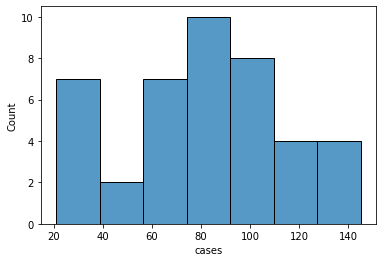

In [112]:
import seaborn as sns
sns.histplot(x=df['cases'])

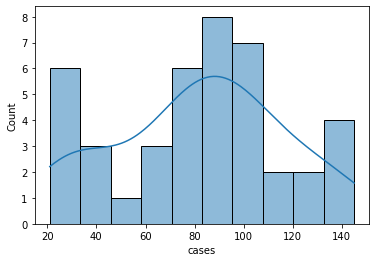

In [113]:
sns.histplot(x=df['cases'], bins=10, kde=True);

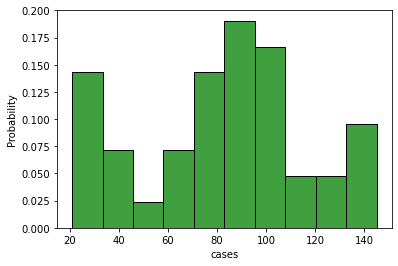

In [114]:
sns.histplot(x=df['cases'], 
             bins=10, kde=False,
             stat="probability",
             color='green' 
            );

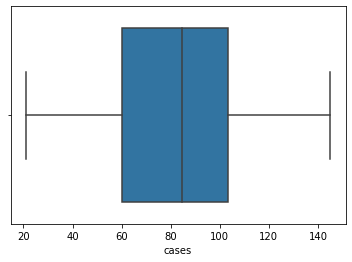

In [115]:
sns.boxplot(x=df['cases']);

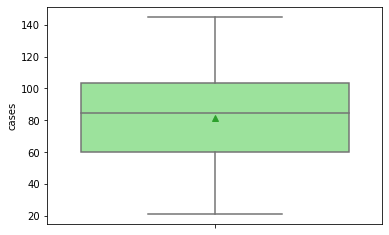

In [116]:
sns.boxplot(y=df['cases'],  color='lightgreen', showmeans=True);

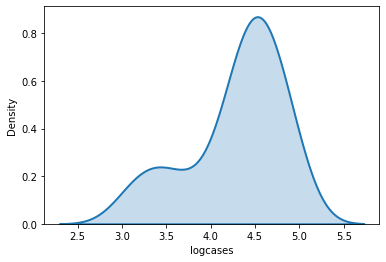

In [117]:
import pandas as pd
import numpy as np

df['logcases'] = np.log(df['cases'])

import seaborn as sns
sns.kdeplot(x=df['logcases'], shade=True, linewidth=2);

In [118]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [119]:
# Measures of Central Tendency

In [120]:
# Mean

In [121]:
mean_ = sum(series) / len(series)
mean_


81.76190476190476

In [122]:
mean_ = statistics.mean(series)
mean_

81.76190476190476

In [123]:
mean_ = statistics.fmean(series)
mean_

81.76190476190476

In [124]:
mean_ = np.mean(series)
mean_


81.76190476190476

In [125]:
mean_ = series.mean()
mean_

81.76190476190476

In [126]:
# Harmonic Mean

In [127]:
hmean = len(series) / sum(1 / item for item in series)
hmean


62.398526705466594

In [128]:
hmean = statistics.harmonic_mean(series)
hmean


62.39852670546655

In [129]:
scipy.stats.hmean(series)

62.39852670546656

In [130]:
# Geometric Mean

In [131]:
gmean = 1
for item in series:
     gmean *= item

gmean **= 1 / len(series)
gmean

72.92853003514415

In [132]:
gmean = statistics.geometric_mean(series)
gmean


72.92853003514416

In [133]:
scipy.stats.gmean(series)

72.92853003514416

In [134]:
# Median

In [135]:
n = len(series)
if n % 2:
     median_ = sorted(series)[round(0.5*(n-1))]
else:
     series_ord, index = sorted(series), round(0.5 * n)

median_ = 0.5 * (series_ord[index-1] + series_ord[index])

median_

84.5

In [136]:
median_ = statistics.median(series)
median_


84.5

In [137]:
median_ = statistics.median(series[:-1])
median_


85

In [138]:
statistics.median_low(series[:-1])



85

In [139]:
statistics.median_high(series[:-1])


85

In [140]:
median_ = np.median(series)
median_



84.5

In [141]:
median_ = np.median(series[:-1])
median_


85.0

In [142]:
series.median()


84.5

In [143]:
# Mode

In [144]:
mode_ = statistics.mode(series)
mode_



99

In [145]:
mode_ = statistics.multimode(series)
mode_


[99]

In [146]:

statistics.mode(series)  # Raises StatisticsError


99

In [147]:
statistics.multimode(series)


[99]

In [151]:
u = np.array(series)
mode_ = scipy.stats.mode(series)
mode_


ModeResult(mode=array([99], dtype=int64), count=array([3]))

In [152]:
mode_ = scipy.stats.mode(series)
mode_


ModeResult(mode=array([99], dtype=int64), count=array([3]))

In [153]:
mode_.mode



array([99], dtype=int64)

In [154]:
mode_.count


array([3])

In [155]:
series.mode()

0    99
dtype: int64

In [ ]:
# Measures of Variability

In [ ]:
# Variance

In [157]:
n = len(series)
mean_ = sum(series) / n
var_ = sum((item - mean_)**2 for item in series) / (n - 1)
var_


1174.966318234611

In [158]:
var_ = statistics.variance(series)
var_


1174.966318234611

In [159]:
statistics.variance(series)


1174.966318234611

In [ ]:
# Standard Deviation

In [160]:
std_ = var_ ** 0.5
std_


34.277781699442144

In [162]:
std_ = statistics.stdev(series)
std_


34.277781699442144

In [ ]:
# Skewness

In [164]:

n = len(series)
mean_ = sum(series) / n
var_ = sum((item - mean_)**2 for item in series) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in series)
         * n / ((n - 1) * (n - 2) * std_**3))
skew_


-0.14283622719079786

In [165]:

scipy.stats.skew(series, bias=False)




-0.14283622719079744

In [166]:

series.skew()



-0.14283622719079747

In [ ]:
# Percentiles

In [167]:

statistics.quantiles(series, n=2)



[84.5]

In [169]:
statistics.quantiles(series, n=4, method='inclusive')


[60.0, 84.5, 103.5]

In [ ]:
# Convert the series into a NumPy array

In [170]:
y = np.array(series)
np.percentile(y, 5)


25.150000000000002

In [171]:

np.percentile(y, 95)


135.95

In [172]:
np.percentile(y, [25, 50, 75])


array([ 60. ,  84.5, 103.5])

In [173]:

np.median(y)


84.5

In [174]:
np.quantile(y, 0.05)


25.150000000000002

In [175]:
np.quantile(y, 0.95)



135.95

In [176]:
np.quantile(y, [0.25, 0.5, 0.75])



array([ 60. ,  84.5, 103.5])

In [189]:
#z = pd.Series(y)
#z

In [190]:
#z.quantile(0.05)
#z



In [180]:
z.quantile(0.95)



135.95

In [181]:
z.quantile([0.25, 0.5, 0.75])



0.25     60.0
0.50     84.5
0.75    103.5
dtype: float64